# Find highly correlated features with cumulative revenue and predict its value by using different regression models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
df = pd.read_csv('../../../Files/FinalFinalFinalClean.csv')

In [23]:
df.shape

(6700, 68)

In [24]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fcumlative', 'fimdb_rating', 'fimdb_votes',
       'fimd', 'fdirector', 'fwriter', 'fassistant_directors',
       'fcinematographers', 'fcomposers', 'feditors', 'fproducer', 'fenglish',
       'fmulti_lang', 'fus', 'fmulti_country', 'fmystery', 'fmusic', 'faction',
       'fsport', 'fmusical', 'ffamily', 'fcomedy', 'fhorror', 'ffantasy',
       'fdrama', 'fsci-fi', 'fthriller', 'fwestern', 'fadventure', 'fhistory',
       'fwar', 'fcrime', 'fromance', 'fbiography', 'fanimation', 'actW',
       'nominated', 'Won', 'month', 'year', 'temp', 'genre_lables',
       'certificate_G', 'certificate_PG', 'certificate_PG-13', 'certificate_R',
       'certificate_Unrated', 'fproduction_BBC Films',
       'fproduction_Columbia Pictures', 'fproduction_Dimension Films',
       'fproduction_DreamWorks', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_Millennium Films',
       'fproduction_New Line Cinema', 'fproduction_Paramount 

In [25]:
df.head()

,fid,fname,fruntime,fcumlative,fimdb_rating,fimdb_votes,fimd,fdirector,fwriter,fassistant_directors,...,fproduction_Paramount Pictures,fproduction_Screen Gems,fproduction_Summit Entertainment,fproduction_Twentieth Century Fox,fproduction_Universal Pictures,fproduction_Walt Disney Pictures,fproduction_other,keep,fGross_y,fbudget_y
0,tt0035423,Kate & Leopold,118.0,76019048.0,6.4,75402.0,0.64,1.0,0.0,0.0,...,0,0,0,0,0,0,1,3,47121859.0,48000000.0
1,tt0113026,The Fantasticks,86.0,49666.0,5.6,1083.0,0.56,1.0,0.0,0.0,...,0,0,0,0,0,0,1,2,49666.0,10000000.0
2,tt0118589,Glitter,104.0,5271666.0,2.2,20967.0,0.22,1.0,0.0,0.0,...,0,0,0,1,0,0,0,3,4274407.0,22000000.0
3,tt0118694,In the Mood for Love,98.0,12854953.0,8.1,110024.0,0.81,1.0,1.0,0.0,...,0,0,0,0,0,0,1,2,2738980.0,229689706.9
4,tt0118926,The Dancer Upstairs,132.0,5227348.0,6.9,6135.0,0.69,10.0,0.0,0.0,...,0,0,0,0,0,0,0,3,2377348.0,19272944.5


### Sperate 2019 Movies

In [26]:
df2019 = df[df['year']== 2019]
df = df[df['year']< 2019]

In [27]:
corr = df.corr()

In [28]:
corr.head()

,fruntime,fcumlative,fimdb_rating,fimdb_votes,fimd,fdirector,fwriter,fassistant_directors,fcinematographers,fcomposers,...,fproduction_Paramount Pictures,fproduction_Screen Gems,fproduction_Summit Entertainment,fproduction_Twentieth Century Fox,fproduction_Universal Pictures,fproduction_Walt Disney Pictures,fproduction_other,keep,fGross_y,fbudget_y
fruntime,1.000000,0.181707,0.339302,0.232673,0.184234,0.151818,0.100316,0.015364,0.106159,0.176587,...,0.027058,-0.035315,0.008759,0.008758,0.033324,0.016616,-0.025019,0.082542,0.007316,0.175767
fcumlative,0.181707,1.000000,0.190813,0.718179,0.106525,0.068275,0.064160,0.041375,0.110647,0.233041,...,0.137068,0.006547,0.059877,0.137483,0.132111,0.206869,-0.303618,0.200462,0.069839,0.560720
fimdb_rating,0.339302,0.190813,1.000000,0.350164,0.596561,0.165494,0.125375,0.026363,0.087904,0.120822,...,-0.002696,-0.031467,0.008710,-0.022618,0.027137,0.031053,0.004269,0.046161,-0.098593,0.162827
fimdb_votes,0.232673,0.718179,0.350164,1.000000,0.199385,0.157150,0.116477,0.039235,0.150064,0.202546,...,0.141844,0.010136,0.079753,0.127492,0.116492,0.098754,-0.287966,0.137384,-0.030592,0.437164
fimd,0.184234,0.106525,0.596561,0.199385,1.000000,0.089436,0.067864,0.013239,0.043862,0.066286,...,-0.004316,-0.020290,0.003581,-0.015947,0.013403,0.016512,0.010663,0.016209,-0.027346,0.083921


# Regression

# Cummulative

## Find top correlated columns

In [29]:
corrGross = pd.DataFrame(corr[abs(corr['fcumlative'])> 0.1]['fcumlative']).sort_values('fcumlative')
grossFeatures = list(corrGross.index)
grossFeatures

['fproduction_other',
 'fdrama',
 'certificate_R',
 'certificate_Unrated',
 'fimd',
 'fcinematographers',
 'fmulti_lang',
 'fproduction_Universal Pictures',
 'fenglish',
 'fproduction_Paramount Pictures',
 'fproduction_Columbia Pictures',
 'fproduction_Twentieth Century Fox',
 'fruntime',
 'actW',
 'fimdb_rating',
 'certificate_PG',
 'keep',
 'fproduction_Walt Disney Pictures',
 'fsci-fi',
 'faction',
 'fus',
 'certificate_PG-13',
 'fcomposers',
 'fanimation',
 'ffamily',
 'Won',
 'ffantasy',
 'nominated',
 'fadventure',
 'fbudget_y',
 'fimdb_votes',
 'fcumlative']

In [30]:
corrGross

,fcumlative
fproduction_other,-0.303618
fdrama,-0.225838
certificate_R,-0.150095
certificate_Unrated,-0.138803
fimd,0.106525
fcinematographers,0.110647
fmulti_lang,0.123630
fproduction_Universal Pictures,0.132111
fenglish,0.132816
fproduction_Paramount Pictures,0.137068


In [32]:
X = df[grossFeatures]
X = X.drop(['fcumlative'], axis=1)
y = df['fcumlative']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# mms = MinMaxScaler()
# X_train = pd.DataFrame(mms.fit_transform(X_train))
# X_test = pd.DataFrame(mms.fit_transform(X_test))
tc = X_train.columns
tsc = X_test.columns

sds = StandardScaler()
X_train = pd.DataFrame(sds.fit_transform(X_train))
X_test = pd.DataFrame(sds.fit_transform(X_test))

X_train.columns = tc
X_test.columns = tsc 

In [36]:
forest_cvg = RandomForestRegressor(n_jobs=-1)
forest_cvg.fit(X_train,y_train)
forest_cvg.score(X_train , y_train)
scoresg = cross_val_score(forest_cvg,X_train, y_train, cv=10)
print(scoresg.mean())

C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7424012099180526


## ElasticNet

In [35]:
en = ElasticNetCV(l1_ratio=1.).fit(X_train, y_train)
print ('Training Score',en.score(X_train, y_train))
scores = cross_val_score(en, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5

Training Score 0.6587569275322605


C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5

Cross-validated scores: [0.64196737 0.70928448 0.59123317 0.66907893 0.69758963 0.68008494
 0.61503656 0.62810684 0.69423568 0.54378707]
Mean of Cross-validated scores: 0.6470404658518215


## Ridge

In [61]:
alpha = np.logspace(-4, 4, 10)
ridge = RidgeCV(alphas = alpha).fit(X_train, y_train)
print ('Training Score',ridge.score(X_train, y_train))

scores = cross_val_score(ridge, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())

Training Score 0.056455341837723494
Cross-validated training scores: [0.05960026 0.05315335 0.05212989 0.05743397 0.03235674 0.0482053
 0.0398089  0.0576894  0.07338702 0.05293856]
Mean of Ccoss-validated training scores: 0.05267033859877533


## Lasso

In [65]:
XL = df.drop(['fid', 'fname', 'month','fGross_y','temp','genre_lables'], axis=1)
yL = df['fGross_y']

In [66]:
XL_train, XL_test, yL_train, yL_test = train_test_split(XL, yL, test_size=0.33, random_state=42)

In [67]:
trcL = XL_train.columns
tscL = XL_test.columns


mms = MinMaxScaler()
XL_train = pd.DataFrame(mms.fit_transform(XL_train))
XL_test = pd.DataFrame(mms.fit_transform(XL_test))


XL_train.columns  = tscL 
XL_test.columns  = tscL 

In [68]:
alpha = np.logspace(-4, 4, 10)
lasso = LassoCV(alphas = alpha).fit(XL_train, yL_train)
print ('Training Score',lasso.score(XL_train, yL_train))

scores = cross_val_score(lasso, XL_train, yL_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())

C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Score 0.3471538897932799


C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5

Cross-validated training scores: [0.33710723 0.33074722 0.35163996 0.28510209 0.28157693 0.37169398
 0.30673727 0.37145034 0.35033828 0.35379504]
Mean of Ccoss-validated training scores: 0.33401883385212905


In [69]:
df_coef = pd.DataFrame(lasso.coef_, index=XL_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
fruntime,-2.601561e+08,2.601561e+08
fimdb_rating,3.052006e+08,3.052006e+08
fimdb_votes,-6.943570e+08,6.943570e+08
fimd,-3.197569e+07,3.197569e+07
fdirector,2.048094e+08,2.048094e+08
...,...,...
fproduction_Walt Disney Pictures,3.173612e+07,3.173612e+07
fproduction_Warner Bros,5.050352e+07,5.050352e+07
fproduction_other,7.909936e+07,7.909936e+07
fbudget_y,-3.241565e+08,3.241565e+08


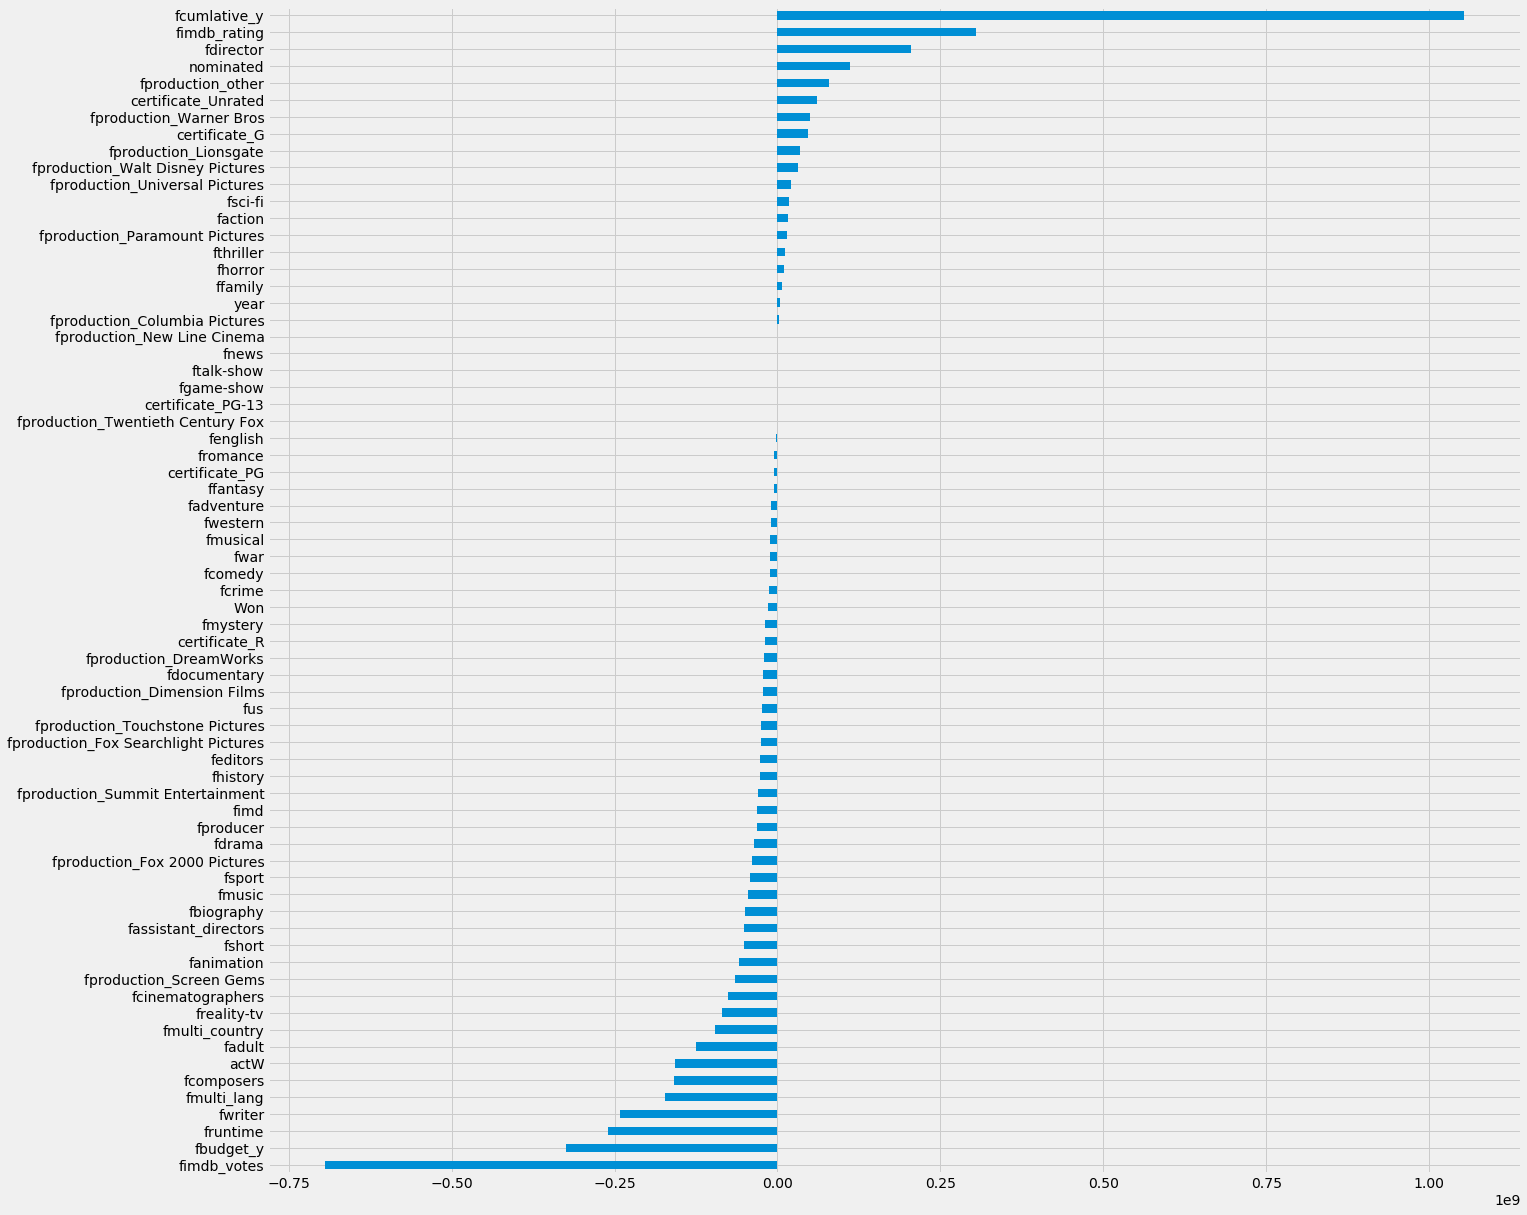

In [70]:
df_coef['coefficients'].sort_values().plot(kind='barh',figsize=(20, 20))

In [77]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corrGross = corr[['fGross_y']].sort_values('fGross_y')
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
   .set_table_styles(magnify())

In [3]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = df.corr()
def magnify():
    
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corrGross = corr[['fcumlative_y']].sort_values('fcumlative_y')
corrGross.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
   .set_table_styles(magnify())

NameError: name 'sns' is not defined

In [79]:
corrcumlative = pd.DataFrame(corr[abs(corr['fcumlative_y'])> 0.1]['fcumlative_y']).sort_values('fcumlative_y')
corrcumlative

,fcumlative_y
fproduction_other,-0.403040
certificate_R,-0.184197
fdrama,-0.131791
certificate_Unrated,-0.126979
fmulti_country,0.101908
fproducer,0.110120
feditors,0.114135
fwriter,0.138287
fproduction_Universal Pictures,0.144075
fproduction_Twentieth Century Fox,0.147240


In [80]:
corrcumlative.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
   .set_table_styles(magnify())

,fcumlative_y
fproduction_other,-0.4
certificate_R,-0.18
fdrama,-0.13
certificate_Unrated,-0.13
fmulti_country,0.1
fproducer,0.11
feditors,0.11
fwriter,0.14
fproduction_Universal Pictures,0.14
fproduction_Twentieth Century Fox,0.15


In [84]:
corrcumlative = corr[['fimdb_rating']]
corrcumlative.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
   .set_table_styles(magnify())

,fimdb_rating
fruntime,0.34
fimdb_rating,1
fimdb_votes,0.25
fimd,0.82
fdirector,0.015
fwriter,0.16
fassistant_directors,0.03
fcinematographers,0.17
fcomposers,0.18
feditors,0.13


In [85]:
corrcumlative = corr[[ 'Won']].sort_values('Won')
corrcumlative.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
   .set_table_styles(magnify())

,Won
fproduction_other,-0.11
certificate_Unrated,-0.059
fGross_y,-0.044
fhorror,-0.04
fcomedy,-0.032
faction,-0.014
certificate_R,-0.012
fcrime,-0.011
fdocumentary,-0.0094
fshort,-0.0091


In [83]:
# plt.figure(figsize=(6,6))
# sns.heatmap(df[[ 'fcomedy', 'fadult', 'fdocumentary', 'fmystery',
#        'fadventure', 'fbiography', 'fshort', 'fnews', 'fthriller', 'ffamily',
#        'fhistory', 'fcrime', 'fhorror', 'ftalk-show', 'fwar', 'fgame-show',
#        'freality-tv', 'fwestern', 'faction', 'fmusical', 'fsport', 'fmusic',
#        'fanimation', 'fromance', 'fsci-fi', 'ffantasy', 'fdrama']].sort_values(by=['fcumlative_y'],ascending=False),
#             vmin=-1,
#             cmap='coolwarm',
#             annot=True);